In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\hksid\\Downloads\\Python 3\\Files\\HD_nomissing.csv")
df.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df_numeric = df[['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']].copy()
df_bool=  df[['gender', 'education', 'currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']].copy()
df_bool_tg=  df[['gender', 'education', 'currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']].copy()


Countplot is to visualize the data better. We can see how many different attributes there is. 

gender
education
currentSmoker
BPMeds
prevalentStroke
prevalentHyp
diabetes


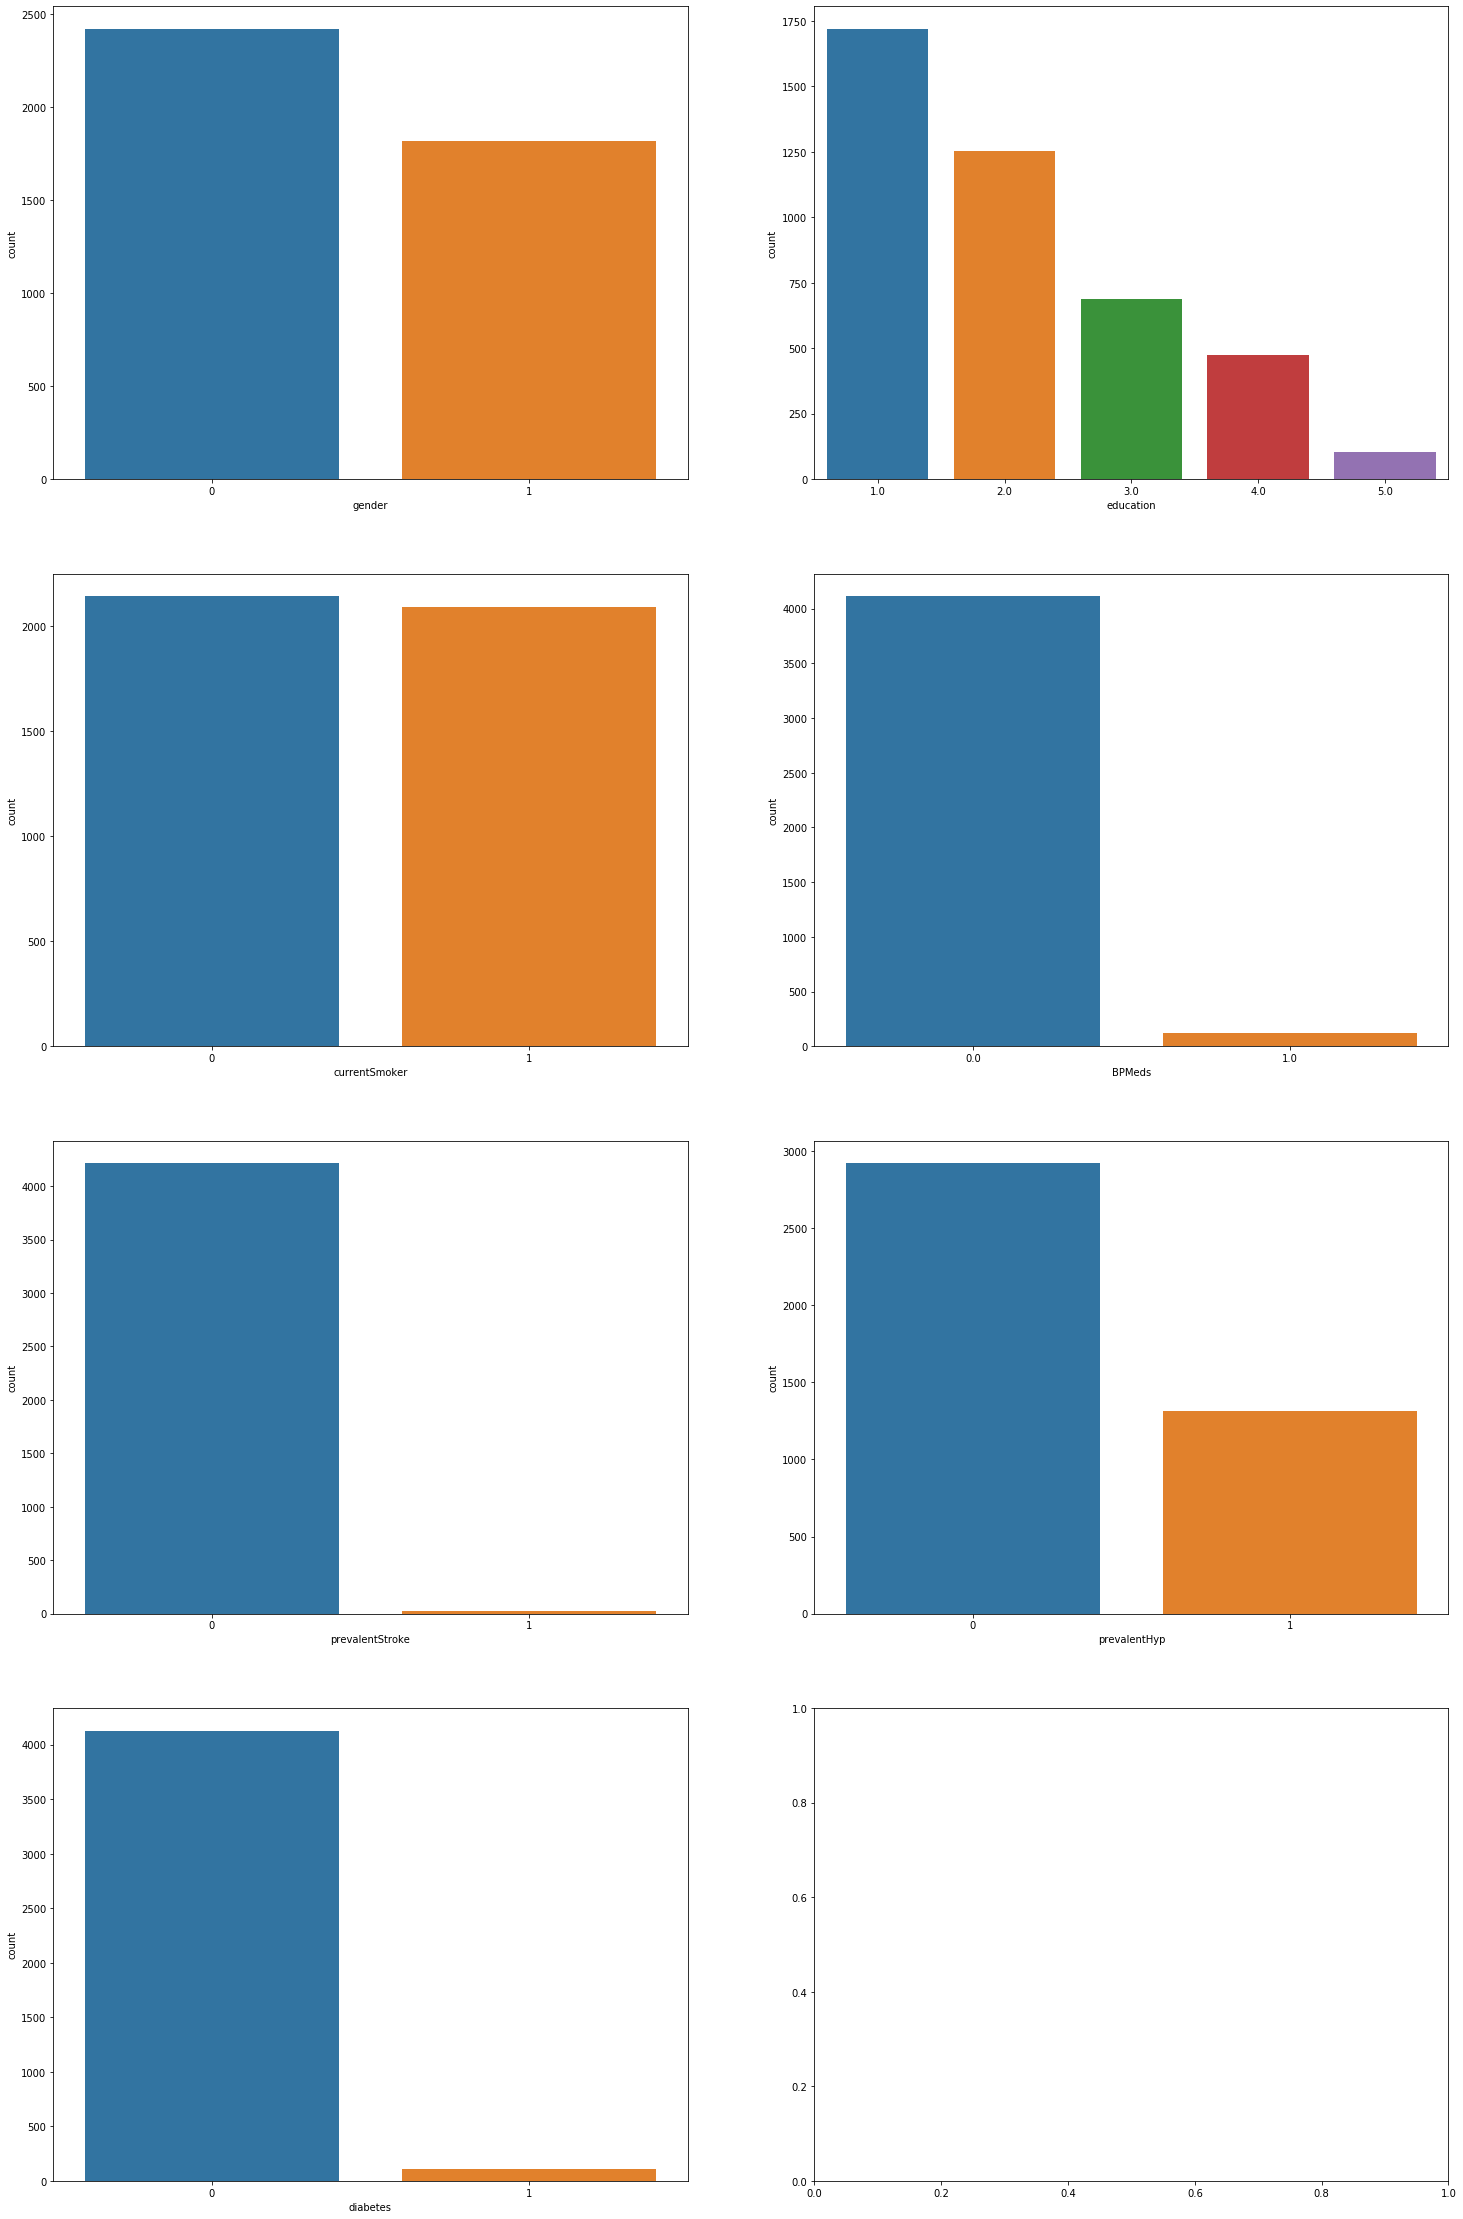

In [4]:
f, axes = plt.subplots(4,2)
f.set_figheight(40)
f.set_figwidth(25)
col_idx = 0
for i in range(4):
    for j in range(2):
        if col_idx==7: 
            break
        x = df_bool.columns[col_idx]
        print(x)
        sns.countplot(x, data=df_bool, ax=axes[i][j])
        col_idx += 1

Females are greater in number than males. 
The number of smokers and non-smokers are roughly the same. 
The number of people who have hypertension is roughly half of that who don't. 

Distplot shows the visualization of the data in different columns. 

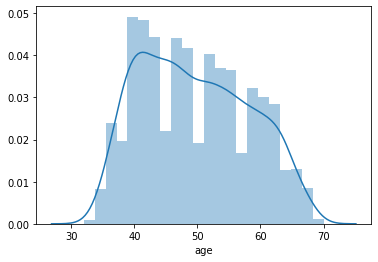

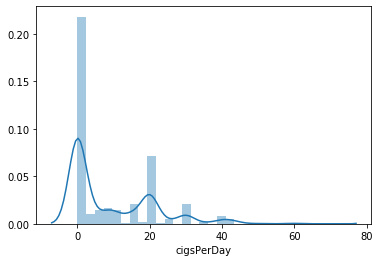

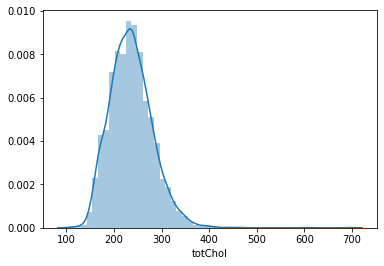

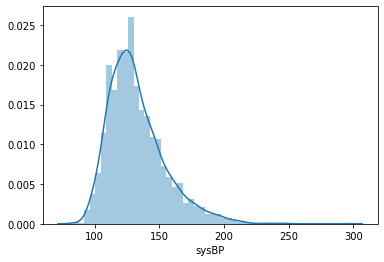

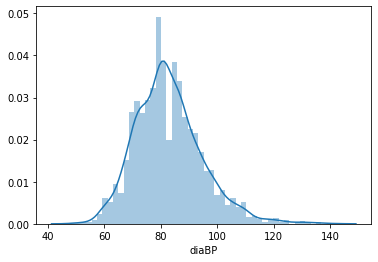

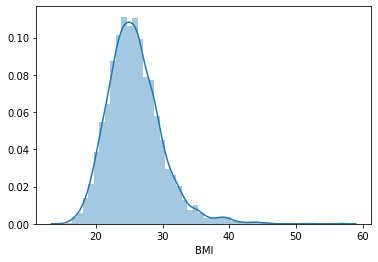

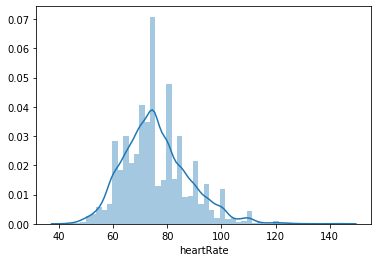

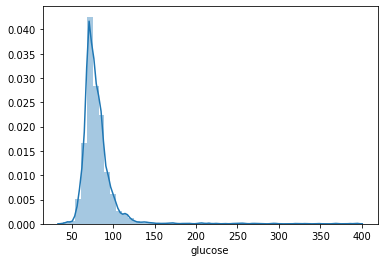

In [5]:
for i in df_numeric.columns:
    sns.distplot(df_numeric[i])
    plt.show()
    

Age distrbution is not a normal distribution. There are intermittent peaks and drops. 
Total cholesterol ,systolic BP, BMI resemble normal distribution. 
diastolic BP, glucose somewaht resemble normal distribution. 

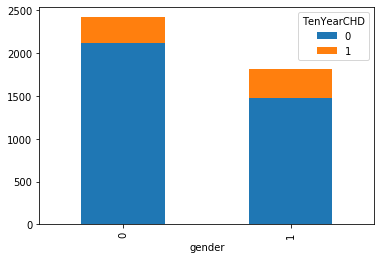

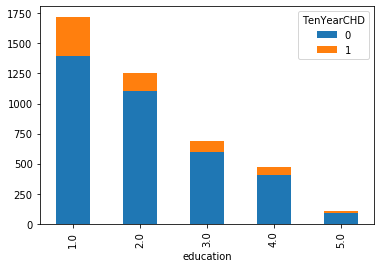

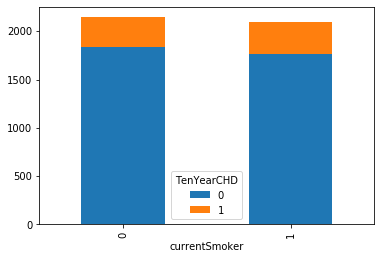

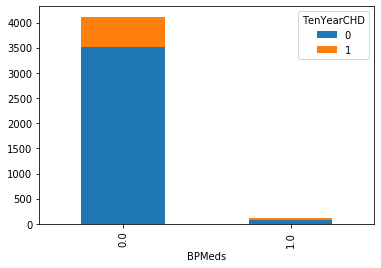

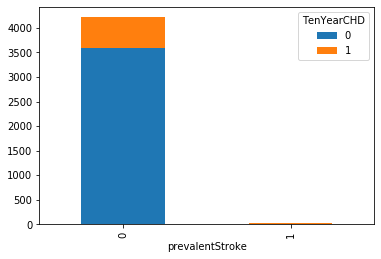

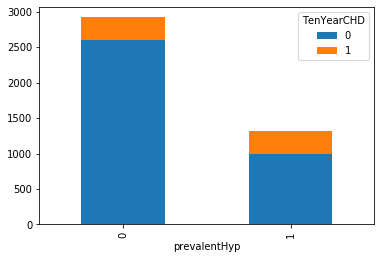

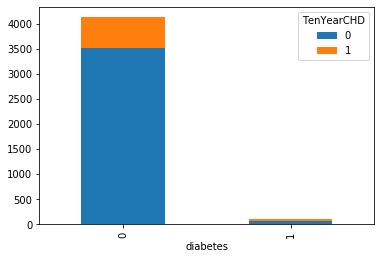

In [6]:
for i in range(7):
    
    x=df_bool.columns[i]

    pd.crosstab(df_bool[x],df['TenYearCHD']).plot.bar(stacked=True)
   
    
    i=+1

Same as the boxplot. Females are at risk if they are older than 60. For males it is 50. 

Females are higher in number than males. 
Number of smokers and non smokers are neraly the same. 


Total numbers of females are higher than that of males. That has refelcted here, as number of CHD free females are higher. It is to be noted that the number of CHD free females are high. So Chi squared test is needed.   

Surprisingly people who currenly smokes and who don't has the same risk of CHD. 

The number of people who have hypertension is nearly half of the people who don't. But people of CHD risk free are nearly the same. Chi squared test is needed to confirm the statistical significance.  

We will use boxplot to visulaize the distribution of the various attributes. 

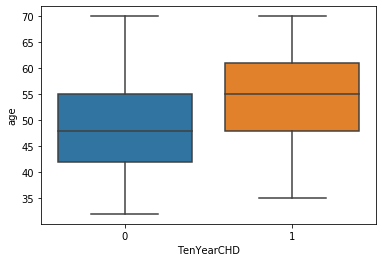

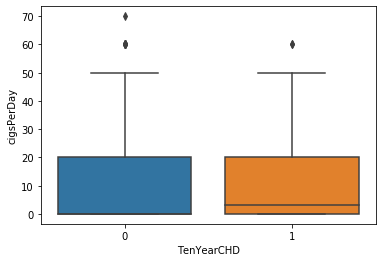

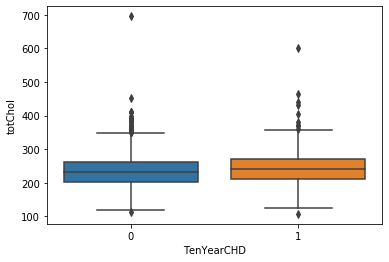

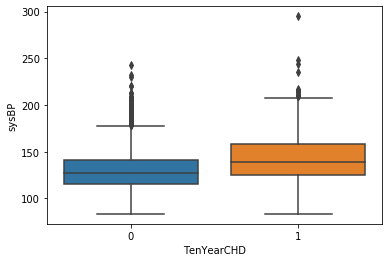

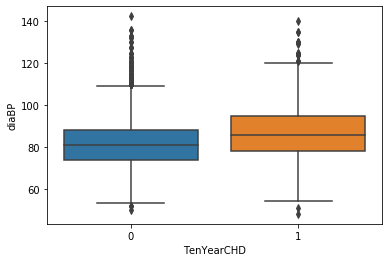

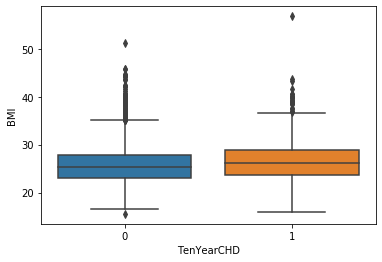

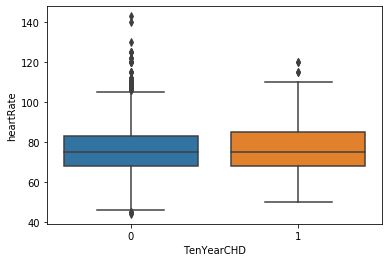

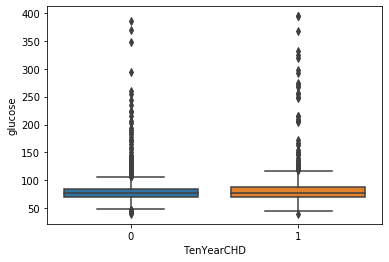

In [7]:
for i in df_numeric.columns:
    sns.boxplot(x='TenYearCHD', y=df_numeric[i], data=df)
    plt.show()



People with risk of CHD are elder than no CHD risk group.
The range of bigarettes per day is same for both groups. 
Total cholesterol is nearly the same for both groups. 
CHD risk group has higher sysBP and diaBP than the no CHD risk group. 
BMI and heartrate are roughly the same. 
Glucose range is very small with large number outliers with much larger values. 
ANOVA test is needed to conclude with statistical significance. 

Gender is an interesting factor we should look into, if there are difference in attributes for both the genders. 

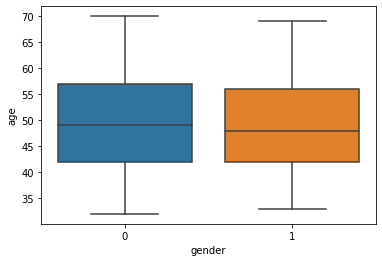

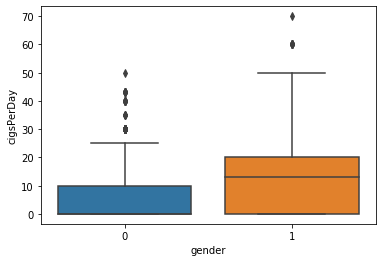

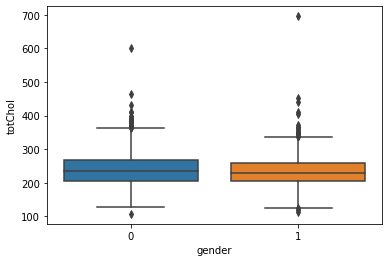

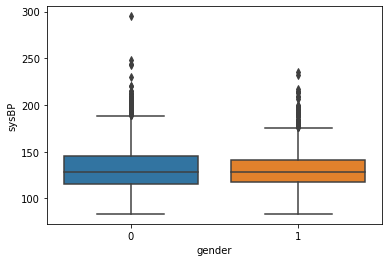

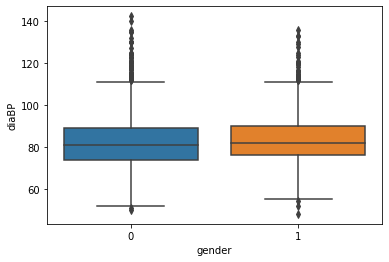

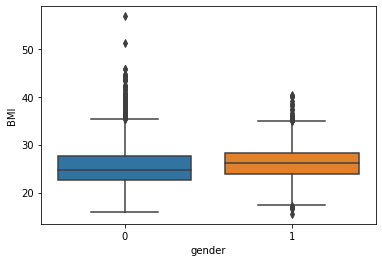

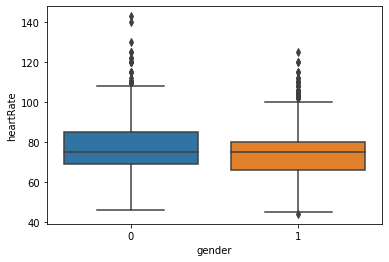

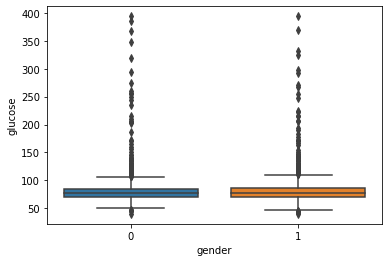

In [8]:

for i in df_numeric.columns:
    sns.boxplot(x='gender', y=df_numeric[i], data=df)
    plt.show()

Comparing with gender, we find that daily cigarette count is very high for males. 
Cholesterol level is more or less the same. Same for Systolic BP. 
Diiastolic BP has many outliers. 

Glucose level range is very small. But has unsual number of outliers for both groups. 


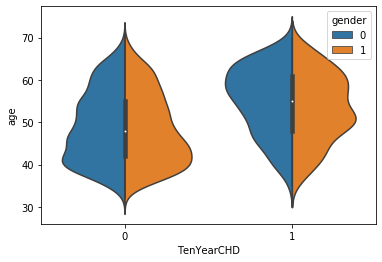

In [9]:
sns.violinplot(x='TenYearCHD', y ='age', data = df, hue ='gender', split = True)

Violitplot and catplot both provide similar information. Elder women are at the risk of CHD where men are more prone to CHD at comparatively early age. 

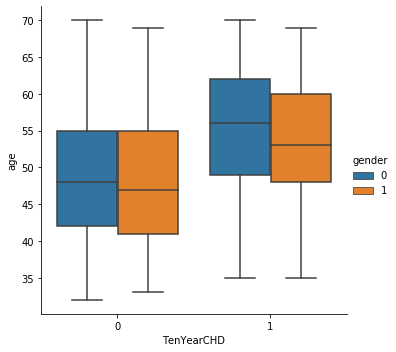

In [10]:
sns.catplot(x='TenYearCHD',y='age',hue='gender',kind='box',data=df)

For no CHD group, the mean age for both groups are close. But for the CHD group, males are more likely to suffer grom CHD at comaratively early age.



Now chi squared test for CHD risk 

In [11]:
from scipy import stats
def chi_sq_test(DF, var1, var2):
    dataset_table = pd.crosstab(DF[var1], DF[var2])
    print('contingency table between {} and {} is:\n'.format(var1, var2))
    print(dataset_table)
    val = stats.chi2_contingency(dataset_table)
    Observed_Values = dataset_table.values 
    Expected_Values = val[-1]
    no_of_rows = dataset_table.shape[0]
    no_of_columns = dataset_table.shape[1]
    ddof = (no_of_rows-1)*(no_of_columns-1)
    print("\nDegree of Freedom:-",ddof)
    alpha = 0.05
    chi_square = sum([(o-e)**2./e for o,e in zip(Observed_Values, Expected_Values)])
    chi_square_statistic = chi_square[0]+chi_square[1]
    critical_value = stats.chi2.ppf(q=1-alpha,df=ddof)
    p_value = 1-stats.chi2.cdf(x=chi_square_statistic,df=ddof)
    
    if chi_square_statistic>=critical_value and p_value<=alpha:
        print("chi_square_statistic is {} and p-value is {}. So, there is a relationship between 2 categorical variables".format(chi_square_statistic, p_value))
    elif chi_square_statistic>=critical_value and p_value>alpha:
        print("chi_square_statistic is {} and p-value is {}. So, there is a weak relationship between 2 categorical variables, but not evident enough".format(chi_square_statistic, p_value))
    else:
        print("chi_square_statistic is {} and p-value is {}. So, these 2 variables are not related at all.".format(chi_square_statistic, p_value))

In [12]:
for i in df_bool_tg.columns:
    chi_sq_test(df_bool_tg, 'TenYearCHD', i)

contingency table between TenYearCHD and gender is:

gender         0     1
TenYearCHD            
0           2118  1476
1            301   343

Degree of Freedom:- 1
chi_square_statistic is 33.13876412178594 and p-value is 8.581080179759226e-09. So, there is a relationship between 2 categorical variables
contingency table between TenYearCHD and education is:

education    1.0   2.0  3.0  4.0  5.0
TenYearCHD                           
0           1397  1106  599  403   89
1            323   147   88   70   16

Degree of Freedom:- 4
chi_square_statistic is 28.804143071764216 and p-value is 8.56720068254102e-06. So, there is a relationship between 2 categorical variables
contingency table between TenYearCHD and currentSmoker is:

currentSmoker     0     1
TenYearCHD               
0              1833  1761
1               311   333

Degree of Freedom:- 1
chi_square_statistic is 1.6042792098599596 and p-value is 0.20529783701529503. So, these 2 variables are not related at all.
contingen

Here, we can see that the following variables have relationship with gender, education, hypertension, diabetes, BPmeds. 
But no relationship with smoking. 

Now we should see the correlation for numeric columns 

In [13]:
df_numeric.corr()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
age,1.000000,-0.192366,0.253023,0.394302,0.206104,0.135283,-0.012947,0.118776
cigsPerDay,-0.192366,1.000000,-0.029491,-0.088505,-0.056391,-0.092453,0.074792,-0.056434
totChol,0.253023,-0.029491,1.000000,0.202917,0.161505,0.111051,0.086057,0.051713
sysBP,0.394302,-0.088505,0.202917,1.000000,0.784002,0.325247,0.182033,0.135178
diaBP,0.206104,-0.056391,0.161505,0.784002,1.000000,0.376544,0.181294,0.059387
BMI,0.135283,-0.092453,0.111051,0.325247,0.376544,1.000000,0.067478,0.082156
heartRate,-0.012947,0.074792,0.086057,0.182033,0.181294,0.067478,1.000000,0.082609
glucose,0.118776,-0.056434,0.051713,0.135178,0.059387,0.082156,0.082609,1.000000


Two BP variables are correlated. 

In [14]:
df.corr()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
gender,1.000000,-0.028979,0.025804,0.197596,0.316807,-0.051545,-0.004546,0.005313,0.015708,-0.058824,-0.035989,0.057933,0.081506,-0.116688,0.018483,0.088428
age,-0.028979,1.000000,-0.139705,-0.213748,-0.192366,0.120955,0.057655,0.307194,0.101258,0.253023,0.394302,0.206104,0.135283,-0.012947,0.118776,0.225256
education,0.025804,-0.139705,1.000000,0.012890,0.001257,-0.009667,-0.037009,-0.077016,-0.033358,-0.013820,-0.118003,-0.051245,-0.107724,-0.058201,-0.027889,-0.048302
currentSmoker,0.197596,-0.213748,0.012890,1.000000,0.766970,-0.048358,-0.032988,-0.103260,-0.044295,-0.050100,-0.130230,-0.107746,-0.167276,0.062270,-0.056799,0.019456
cigsPerDay,0.316807,-0.192366,0.001257,0.766970,1.000000,-0.045663,-0.032706,-0.065947,-0.037063,-0.029491,-0.088505,-0.056391,-0.092453,0.074792,-0.056434,0.057775
BPMeds,-0.051545,0.120955,-0.009667,-0.048358,-0.045663,1.000000,0.114609,0.258697,0.051394,0.074494,0.251503,0.192356,0.099647,0.015152,0.049289,0.086417
prevalentStroke,-0.004546,0.057655,-0.037009,-0.032988,-0.032706,0.114609,1.000000,0.074830,0.006949,0.001416,0.057009,0.045190,0.024840,-0.017670,0.019910,0.061810
prevalentHyp,0.005313,0.307194,-0.077016,-0.103260,-0.065947,0.258697,0.074830,1.000000,0.077808,0.161328,0.696755,0.615751,0.300572,0.147107,0.084234,0.177603
diabetes,0.015708,0.101258,-0.033358,-0.044295,-0.037063,0.051394,0.006949,0.077808,1.000000,0.040206,0.111283,0.050329,0.086250,0.049005,0.603522,0.097317
totChol,-0.058824,0.253023,-0.013820,-0.050100,-0.029491,0.074494,0.001416,0.161328,0.040206,1.000000,0.202917,0.161505,0.111051,0.086057,0.051713,0.079197


The two BP variables and Hypertension variables are correlated. 
Same for glucose and diabetes variables. 

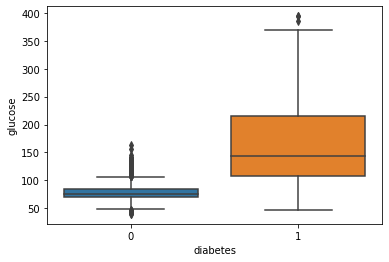

In [15]:
sns.boxplot(x='diabetes', y='glucose', data=df)
plt.show()

This is to check whether the respondents were aware of their glucose level or not. It seems that some of these are not aware of their condition. 

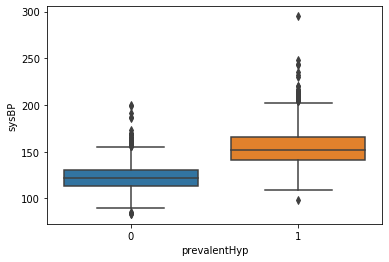

In [16]:
sns.boxplot(x='prevalentHyp', y='sysBP', data=df)
plt.show()

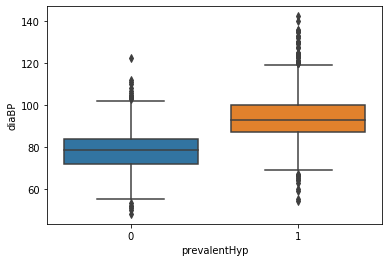

In [17]:
sns.boxplot(x='prevalentHyp', y='diaBP', data=df)
plt.show()

There are quite a few outliers. People who thought they had hypertension had body metric suggesting otherwise and vice versa. 

Now let's change the target variable data into two groups. 0 for no and 1 for yes. 

In [18]:
def rate_descriptor(x):
    if x==0:
        return "No"
    elif x==1:
        return "Yes"
   

df['TenYearCHD'] = df['TenYearCHD'].apply(lambda x:rate_descriptor(x))
    
df.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,Yes
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No


ANOVA test should be done to find if the means are different for different column for "yes" and "no" groups. 

In [19]:
from scipy import stats

In [20]:
grouped_test = df[['TenYearCHD', 'sysBP']].groupby(['TenYearCHD'])

In [21]:
stats.f_oneway(grouped_test.get_group('Yes')['sysBP'], 
              grouped_test.get_group('No')['sysBP'])

F_onewayResult(statistic=208.17180251992562, pvalue=4.195339891486877e-46)

In [22]:
grouped_test = df[['TenYearCHD', 'age']].groupby(['TenYearCHD'])
stats.f_oneway(grouped_test.get_group('Yes')['age'], 
              grouped_test.get_group('No')['age'])                                               

F_onewayResult(statistic=226.42482952300466, pvalue=6.8450085874350565e-50)

In [23]:
grouped_test = df[['TenYearCHD', 'glucose']].groupby(['TenYearCHD'])
stats.f_oneway(grouped_test.get_group('Yes')['glucose'], 
              grouped_test.get_group('No')['glucose'])   

F_onewayResult(statistic=64.11427253061633, pvalue=1.5039932508809202e-15)

In [24]:
grouped_test = df[['TenYearCHD', 'cigsPerDay']].groupby(['TenYearCHD'])
stats.f_oneway(grouped_test.get_group('Yes')['cigsPerDay'], 
              grouped_test.get_group('No')['cigsPerDay'])   

F_onewayResult(statistic=14.186824643709517, pvalue=0.00016777295330761303)

In [25]:
grouped_test = df[['TenYearCHD', 'totChol']].groupby(['TenYearCHD'])
stats.f_oneway(grouped_test.get_group('Yes')['totChol'], 
              grouped_test.get_group('No')['totChol'])   

F_onewayResult(statistic=26.736772320841148, pvalue=2.439008983381133e-07)

In [26]:
grouped_test = df[['TenYearCHD', 'BMI']].groupby(['TenYearCHD'])
stats.f_oneway(grouped_test.get_group('Yes')['BMI'], 
              grouped_test.get_group('No')['BMI'])   

F_onewayResult(statistic=23.75708530492331, pvalue=1.1329148185875128e-06)

In [27]:
grouped_test = df[['TenYearCHD', 'heartRate']].groupby(['TenYearCHD'])
stats.f_oneway(grouped_test.get_group('Yes')['heartRate'], 
              grouped_test.get_group('No')['heartRate'])   

F_onewayResult(statistic=2.1872470069658267, pvalue=0.13923219942180587)

In [28]:
grouped_test = df[['TenYearCHD', 'diaBP']].groupby(['TenYearCHD'])
stats.f_oneway(grouped_test.get_group('Yes')['diaBP'], 
              grouped_test.get_group('No')['diaBP'])   

F_onewayResult(statistic=91.35845440549996, pvalue=1.9688347291862935e-21)

Other than heart rate, other variables have some degree of association with the target variable. 